# **SYRIAN TELECOM CUSTOMER CHURN ANALYTICS**

## **BUSINESS UNDERSTANDING** 



### **OVERVIEW AND BUSINESS UNDERSTANDING**
  In a world where communication means are evolving rapidly it is important for a company such as ours to keep upto date with our customers as they are the true heroes in our journey.That is why when customers stop using our products in a phenomenon known as churn we get concerned as it impacts our market shares,revenue and even affect our brand name.

  To solve this problem our company decided to undertake a pro active approach via  a data driven method to solve this problem and find out why our customers have suddenly decided to stop using our products.We feel it is the right step to undertake so that we are able to solve the issues affecting our customers and make a difference

  Key Question for this project: Are there predictable patterns in customer behavior and account details that signal an impending decision to churn?

#### THE KEY STAKEHOLDERS OF THIS PROJECT ARE:

  *1. the marketing team*

  *2. the customer service team*
  
  *3. The managers of the company*

### **CHALLENGES**

***The challenges in predicting churn are numerous which may include:***

**Volatile Market:** The telecom market is saturated, with competitors constantly offering aggressive promotions, making customer loyalty fragile.

**Multi-Dimensionality:** Churn is often influenced by multiple interacting factors, such as service quality, pricing, contract terms, technical support experiences, and specific calling/data habits, making it difficult to isolate the key drivers.

**Class Imbalance:** In a stable business, the number of customers who churn is typically small compared to those who remain loyal. This class imbalance can make training an accurate predictive model difficult.

### **PROPOSED SOLUTION**

*Our approach will involve predictive modeling  on a dataset of SyriaTel dataset:*

**Performing Exploratory Data Analysis (EDA):** This helps to understand the distribution of customer features and identify initial correlations with churn.

**Applying Machine Learning techniques:**  this  build's a classifier that predicts the probability of an individual customer churning.

### **PROBLEM STATEMENT**
The company needs a reliable, data-driven system to predict which current customers are most likely to discontinue their service with us SyriaTel in the near future. Specifically, what specific customer characteristics, usage patterns, or account details are the strongest predictors of customer churn, and how can a classification model be built to identify these "at-risk" customers?

### **OBJECTIVES**
To explore and summarize customer data to identify differences between churning and non-churning groups.

To train a classification model to accurately predict customer churn.

To provide actionable insights and a prioritized list of at-risk customers for the marketing and retention teams.

**BRIEF CONCLUSION**
By successfully building and deploying this predictive churn model, we can shift from a reactive to a proactive retention strategy

## **DATA UNDERSTANDING**
The goal in this step is to understand our dataset , see it's structure and content. We will also select the columns that will effectively help us build models that will help us as a company address this issue effectively.

In [1]:
# we begin by loading the dataset and necessary libraries more libraries will be loaded as we proceed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score







In [2]:
df=pd.read_csv('bigml_a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.duplicated().sum()

np.int64(0)

### **Based of the review of our data we understood the following:**

***we have a record of 3333 customers and 21 columns***

***we have no missing values in our data***

***We have a mixture of datatypes we have floats,interger and objects***

***Our dataset also does not have duplicate values***

**I will analyse the target variable churn  to get better understading of the variable**

In [5]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

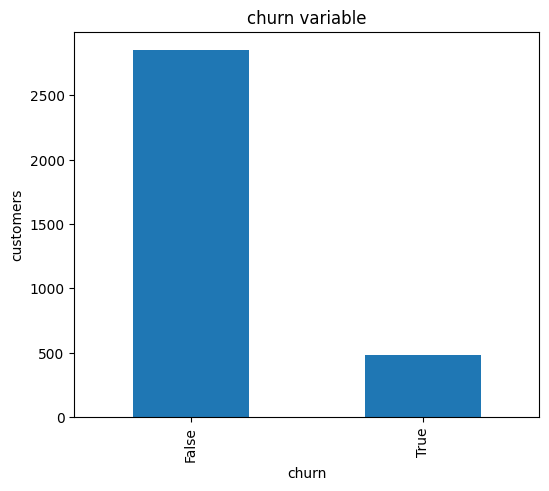

In [6]:
# for better understanding a graph is appropriate
plt.figure(figsize=(6,5))
df['churn'].value_counts().plot(kind='bar')
plt.title('churn variable')
plt.xlabel('churn')
plt.ylabel('customers')
plt.show()
          

## **DATA PREPARATION AND ANALYSIS**

***For this project we have to define the data we are going to need based on the columns and the one's we will drop as written below:***

we will drop the following columns **state,area code,phone number and number of voice messages**.this is because they are unique identifiers and redundant.
 
 ***The remaining columns except churn  which will be our y or target variable will be our X independent variables***

In [7]:
# to drop those columns we will use the drop method  
# columns include state,area code,phone number,number vmail messages
df_new=df.drop(['state','area code','phone number','number vmail messages'],axis=1)
df_new.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

we have a few columns which are categorical in nature and thus we have to convert them into interger so that our machine can understand them properly.This will be done via a method known as *one hot encoding* as shown below

for our churn column we will convert it into  the datatype interger as sklearn library can handle the target variable directly as booleans or intergers

In [9]:
 # we need to import the library for one hot encoding then convert categorical columns

ohe=OneHotEncoder()
categorical_cols=['international plan','voice mail plan',]
encoded_data=ohe.fit_transform(df_new[categorical_cols]).toarray()
encoded_df=pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out(categorical_cols))
encoded_df.head()


,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0


In [10]:
# we need to drop the original columns as we have created new ones
df_new = df_new.drop(['international plan', 'voice mail plan'], axis=1)
df_new = pd.concat([df_new, encoded_df], axis=1)



In [11]:
df_new['churn']=df_new['churn'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   total day minutes       3333 non-null   float64
 2   total day calls         3333 non-null   int64  
 3   total day charge        3333 non-null   float64
 4   total eve minutes       3333 non-null   float64
 5   total eve calls         3333 non-null   int64  
 6   total eve charge        3333 non-null   float64
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total night charge      3333 non-null   float64
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  total intl charge       3333 non-null   float64
 13  customer service calls  3333 non-null   int64  
 14  churn                   3333 non-null   

In [12]:
# next we separate X and y columns before we can begin using the data for modelling
X = df_new.drop('churn', axis=1)
y = df_new['churn']

# **MODELING**

**Now  we can begin modelling our baseline model** 


#### ***MY algorithim of choice was the desicion tree because it handles both types of data well,it is easily intepratable but I am very curious and thus decided to add a logistic regression model for comparison  and see how it performs.***



In [13]:
# our columns are already defined and libraries already imported
# we begin with the decision tree model
# we first split the data into training and testing sets
# this is initialising my  model
# now we can model our baseline model using decision tree we will use a cart algorithm
# we continue by training my model and then making predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
baseline_tree=DecisionTreeClassifier(random_state=42)
baseline_tree.fit(X_train,y_train)
y_pred=baseline_tree.predict(X_test)



In [14]:
# to evaluate my model I will use a classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       566
           1       0.73      0.75      0.74       101

    accuracy                           0.92       667
   macro avg       0.84      0.85      0.85       667
weighted avg       0.92      0.92      0.92       667



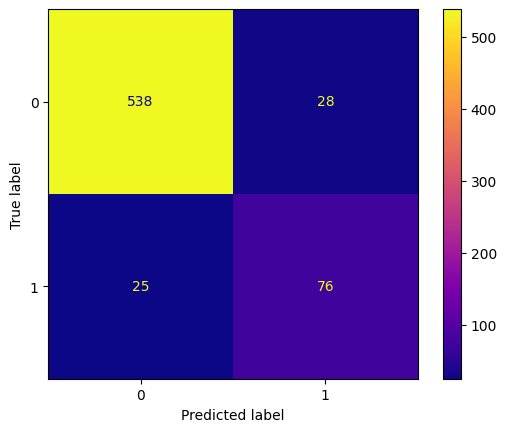

In [15]:
#we can use a confusion matrix to visualize the performance of the  model
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_tree.classes_)
disp.plot(cmap='plasma')    
plt.show()


**Looking at my classification report  I can see that my baseline model has some issues with overfitting , imbalanced data and efficiency that  is why a tuned version of the desicion tree will be implemented to help solve these issues and improve perfomance.**

the tuned model will be implemented via the following hyperparameters:

  *1.class weight-balanced this will solve the imbalance issue*

  *2 max depth- we usually set this to deal with overfitting problem in the model*

  *3 criterion- it combines gini and entropy to measure impurity in our dataset to see which yields better reults*

  *4 min sample leaf-it sets the minimum number of samplesrequired to be a leaf node*

  *5 we have a small dataset so we will use gridsearch cv for hyperparameter tuning*

In [16]:
parameters_grid = {
    'class_weight': [None, 'balanced'],
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=parameters_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)
grid_search.best_params_


                           
    


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10}

In [17]:
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.81      0.69      0.75       101

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667



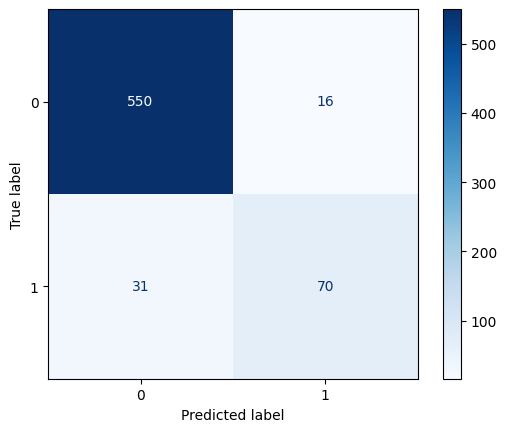

In [18]:
#we can use a confusion matrix to visualize the performance of the  model
cm=confusion_matrix(y_test,y_pred_best)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_tree.classes_)
disp.plot(cmap=plt.cm.Blues)    
plt.show()

FROM OUR  ENHANCED desicion tree we can see the changes and increased perfomance as we desired to happen in our model so that we can better predict the churn process occuring we can see that :

*precision increased by +0.08*

*recall decreased by 0.06*

*the best algorithim was entropy*

*the accuracy improved by +0.01*


In [19]:
# we can  also check the feature importance of our best model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_tree.feature_importances_
}).sort_values('Importance', ascending=False)

### ***Now I can model the logistic model for comparison*** 

In [20]:

# I  first create a pipeline that scales the data and prevents data leakage

baseline_pipeline=Pipeline([ ('scaler',StandardScaler()),
                            ('logreg',LogisticRegression(max_iter=100, random_state=42))
])
baseline_logreg=baseline_pipeline
baseline_logreg.fit(X_train,y_train)
y_pred_logreg=baseline_logreg.predict(X_test)




In [21]:
# the classification report for my model
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.57      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



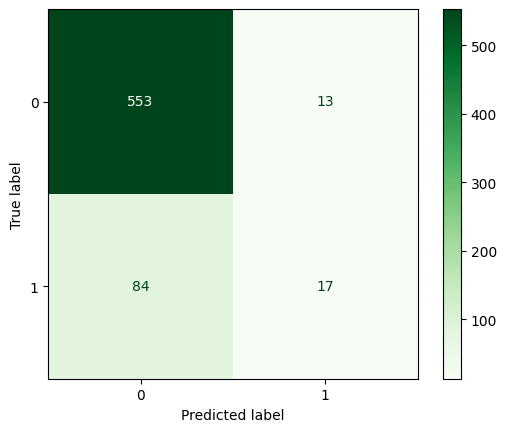

In [22]:
# confusion matrix for baseline  logistic regression
cm_logreg=confusion_matrix(y_test,y_pred_logreg)
disp_logreg=ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=baseline_logreg.classes_)
disp_logreg.plot(cmap=plt.cm.Greens)

**the baseline logistic model also perfomed like my baseline desicion tree terribly for example my recall is 0.17 very low and thus the need for a tuned version of the model** 
 
**the classification report also highly suggests some tuning is required**

the tuned logistic model will be executed via the following hyperparameters:

  *class_weight this handles  imbalancing in the dataset*

  *C which deals with regularization and prevent overfitting*

  *solver to help in optimization of the model*

*we will also use gridsearch cv since our dataset is still the same small in size*



In [23]:
parameter_grid= {
    'logreg__class_weight': [None, 'balanced'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear','lbfgs'],
}
 
grid_search_logreg = GridSearchCV(estimator=baseline_logreg, param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search_logreg.fit(X_train, y_train)  
grid_search_logreg.best_params_ 

{'logreg__C': 0.01,
 'logreg__class_weight': 'balanced',
 'logreg__solver': 'lbfgs'}

In [24]:
best_logreg = grid_search_logreg.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred_best_logreg))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       566
           1       0.40      0.77      0.53       101

    accuracy                           0.79       667
   macro avg       0.68      0.78      0.70       667
weighted avg       0.87      0.79      0.82       667



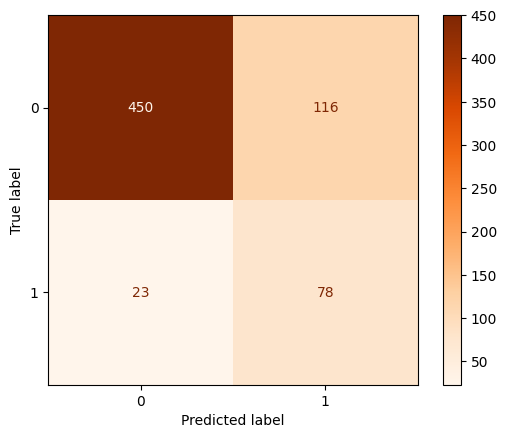

In [25]:
# confusion matrix for tuned model
cm_best_logreg=confusion_matrix(y_test,y_pred_best_logreg)
disp_best_logreg=ConfusionMatrixDisplay(confusion_matrix=cm_best_logreg, display_labels=best_logreg.classes_)
disp_best_logreg.plot(cmap=plt.cm.Oranges)

from our tuned logistic regression model we can see the following changes:

*recall increased by alot +0.60*

*accuracy decreased by -0.06*

*precision also decreased by -0.17*


however there was a trade off  because as the accuracy decreased it meant that the model was ablee to  locate more churning customers thus functioning as desired.


 this can further be visualised using ROC  curve as shown below

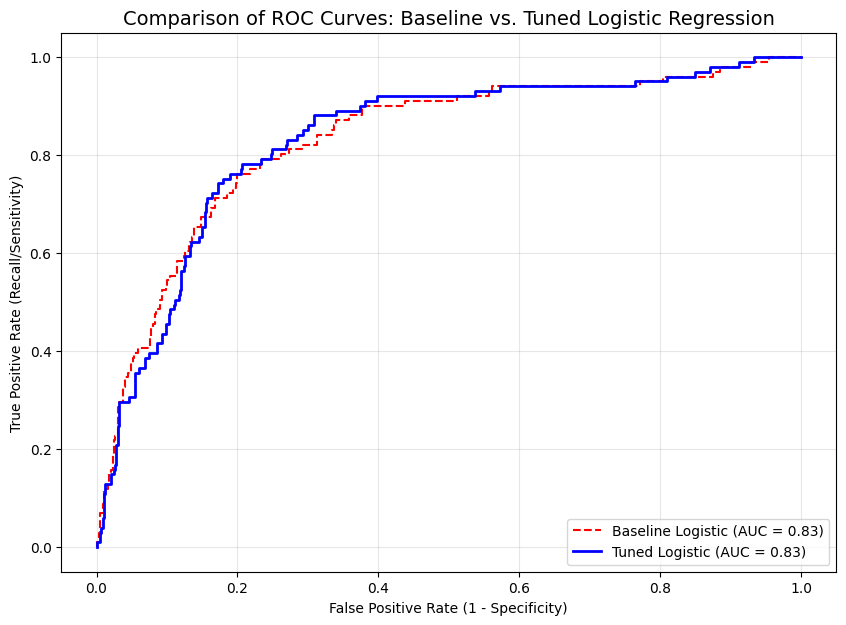

In [26]:
# roc and auc for this logistic models 
y_probs_baseline = baseline_logreg.predict_proba(X_test)[:, 1]
fpr_base, tpr_base, _ = roc_curve(y_test, y_probs_baseline)
auc_base = roc_auc_score(y_test, y_probs_baseline)
 
y_probs_tuned = best_logreg.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_probs_tuned)
auc_tuned = roc_auc_score(y_test, y_probs_tuned)

plt.figure(figsize=(10, 7))
plt.plot(fpr_base, tpr_base, 
         label=f'Baseline Logistic (AUC = {auc_base:.2f})',
           linestyle='--', color='red')
plt.plot(fpr_tuned, tpr_tuned,
          label=f'Tuned Logistic (AUC = {auc_tuned:.2f})',
            color='blue', linewidth=2)


plt.title('Comparison of ROC Curves: Baseline vs. Tuned Logistic Regression', fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall/Sensitivity)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


## **EVALUATION**

**Comparing both models it is clear the desicion tree was the better model by far as it gave better resuls.**

**The logistic model also had some impact and a new perspective to the project but for future reference and deployment the desicion tree will be the model of choice.**


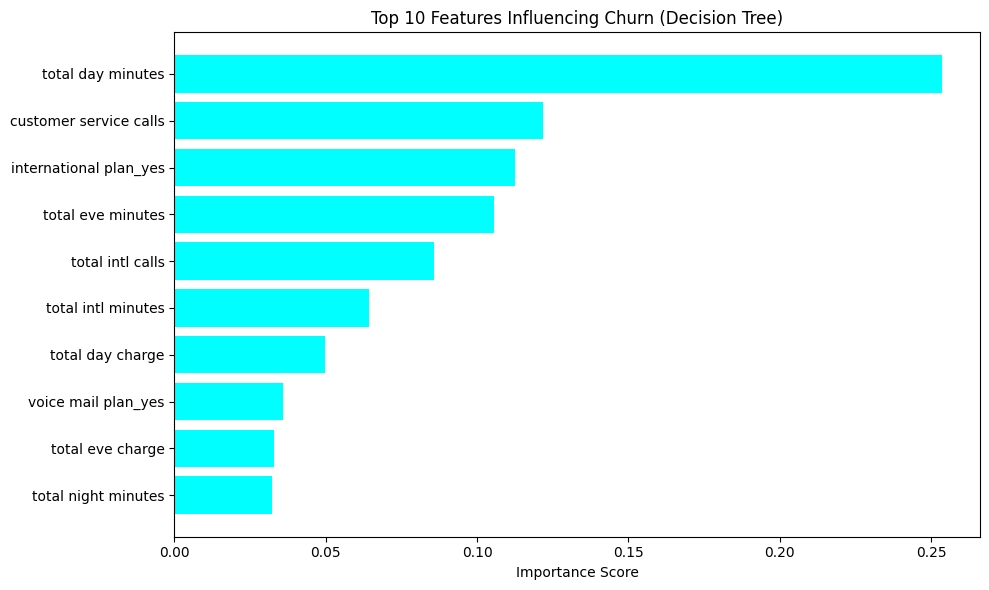

In [ ]:
# we need a graph to show the factors that affect churn the most i will use  so as to get insights for the business i need 10
#this will be easy as we will use the feature importance attribute we got from the deisicon tree model
top_features = feature_importance.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"],color='aqua')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Features Influencing Churn (Decision Tree)")

plt.tight_layout()
plt.show()

## for the bussiness side we noticed the following key insights from our  graph above:

1 *customers who tend to churn have an international plan and should be given better offers*

2 *customers who use our day and night call plans should be giver nebtter rates*

3 *customer care should improve their services and human skills- soft skills training is recommended for them as most customers tend to churn after customer care calls*
